In [199]:
import pandahouse as ph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student',
                      'password':'dpo_python_2020'
                     }

In [139]:
def toList(string):
    return [element.strip("'[]") for element in string.replace(' ','').split(",")]

In [2]:
connection_test = dict(database='test',
                  host='http://clickhouse.beslan.pro:8080',
                  user='student-rw',
                  password='656e2b0c9c')

In [264]:
q = '''
    SELECT 
        room_type,
        toFloat32OrNull(replaceRegexpAll(price, '[$,]','')) AS price,
        toDateOrZero(first_review) AS first_review
    FROM ldn_listings
    WHERE 
        experiences_offered != 'none'
        and
        first_review > toDate('2010-01-01')
    LIMIT 1000
    '''

In [266]:
df = ph.read_clickhouse(query=q, connection=connection_default)
df.first_review.unique()

array(['2010-08-18T00:00:00.000000000', '2010-09-15T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2012-08-07T00:00:00.000000000',
       '2010-09-25T00:00:00.000000000', '2011-07-09T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2011-03-16T00:00:00.000000000',
       '2013-09-03T00:00:00.000000000', '2012-08-14T00:00:00.000000000',
       '2012-10-06T00:00:00.000000000', '2013-05-28T00:00:00.000000000',
       '2017-12-27T00:00:00.000000000', '2013-10-23T00:00:00.000000000',
       '2013-06-21T00:00:00.000000000', '2013-11-12T00:00:00.000000000',
       '2011-08-14T00:00:00.000000000', '2011-08-01T00:00:00.000000000',
       '2013-04-19T00:00:00.000000000', '2015-07-04T00:00:00.000000000',
       '2011-05-18T00:00:00.000000000', '2013-09-09T00:00:00.000000000',
       '2011-09-13T00:00:00.000000000', '2011-07-13T00:00:00.000000000',
       '2011-10-12T00:00:00.000000000', '2011-10-16T00:00:00.000000000',
       '2012-12-11T00:00:00.000000000', '2012-03-19

In [258]:
# data = df.pivot(index='neighbourhood_cleansed', columns='experiences_offered', values='experiences_count')
# cmap=sns.cubehelix_palette(as_cmap=True)
# sns.heatmap(data=data, cmap=cmap)

# for i in lst:
#     sns.distplot(a=df.query('room_type==@i').price, kde=False, label=lst)
sns.set(rc={"figure.figsize": (10, 10)}, )
# plt.show()

# for i in lst:
#     sns.distplot(a=np.log(df.query('room_type==@i').price), kde=False, label=lst)
# sns.set(rc={"figure.figsize": (20, 10)}, )
# plt.show()

In [253]:
df.plot()

ValueError: view limit minimum -36851.4 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x720 with 1 Axes>

In [58]:
data = q_test.groupby('room_type', as_index=False).mean()

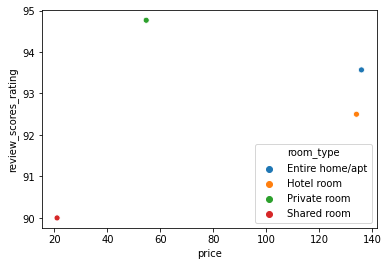

In [67]:
sns.scatterplot(data=data, x=data.price, y=data.review_scores_rating, hue=data.room_type)

In [40]:
q_test.query('room_type == "Private room"').price

0       65.0
3      150.0
5       29.0
6      100.0
8       72.0
       ...  
991     45.0
992     40.0
993     80.0
994     57.0
997     65.0
Name: price, Length: 551, dtype: float32